<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/Nagira/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars_data = pd.read_csv('/content/sample_data/Toyota.csv', index_col=0, na_values=["??", "????"])

In [ ]:
cars_data.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Capped_Price
1344,8950,74.0,61700.0,Petrol,110.0,0.0,0,1600,5,1070,8950
813,10950,62.0,71000.0,Petrol,110.0,0.0,0,1600,5,1070,10950
1357,7900,76.0,60000.0,Petrol,110.0,0.0,0,1600,3,1050,7900
559,13500,50.0,39706.0,Petrol,110.0,1.0,0,1600,5,1080,13500
1385,8250,80.0,52700.0,Petrol,110.0,0.0,0,1600,3,1050,8250
1017,8900,68.0,35000.0,Petrol,110.0,1.0,0,1600,3,1050,8900
140,16450,20.0,22588.0,Petrol,97.0,1.0,0,1400,5,1110,16000
1248,7750,74.0,78894.0,Petrol,110.0,0.0,0,1600,5,1070,7750
1268,8950,69.0,75000.0,Petrol,86.0,1.0,0,1300,4,1000,8950
1081,9500,80.0,137178.0,Diesel,90.0,1.0,0,2000,5,1135,9500


In [ ]:
cars_data.dropna(axis=0, inplace=True)


In [ ]:
cars_data.describe()


,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,10735.937044,55.661496,69268.826642,101.806569,0.673358,0.052920,1568.863139,1073.416971
std,3636.716945,18.699777,38070.667467,15.034116,0.469199,0.223975,184.386960,51.812821
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.000000
25%,8450.000000,43.000000,43590.500000,90.000000,0.000000,0.000000,1400.000000,1045.000000
50%,9900.000000,60.000000,63393.500000,110.000000,1.000000,0.000000,1600.000000,1070.000000
75%,11950.000000,70.000000,88031.750000,110.000000,1.000000,0.000000,1600.000000,1090.000000
max,31275.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.000000


<Axes: xlabel='Age', ylabel='Price'>

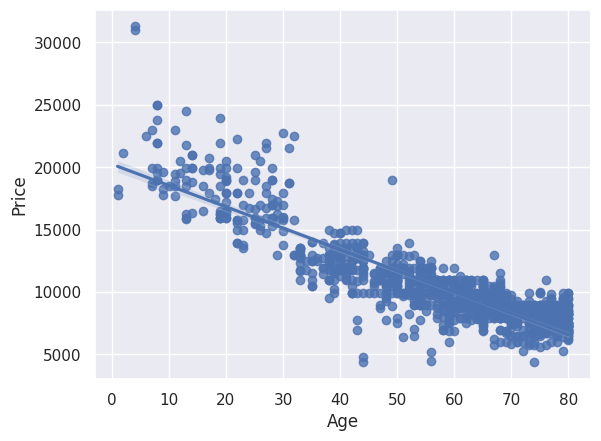

In [ ]:
# Use regplot to see the correlation between Age and Price columns and drawn regression line as well. It shows -ve correlation between 'Age' and "Price"
sns.set(style="darkgrid")
sns.regplot(x=cars_data['Age'], y=cars_data['Price'])

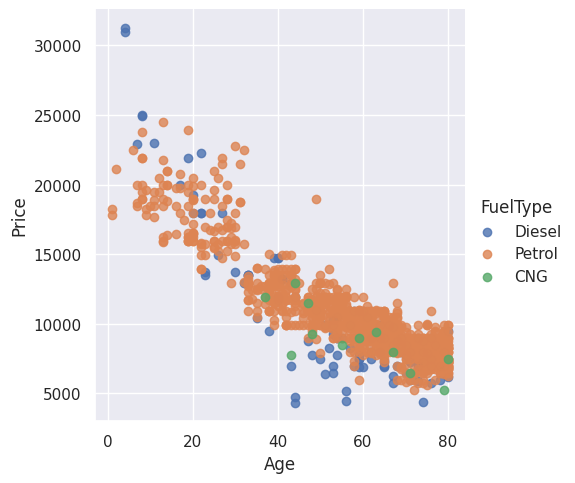

In [ ]:
# Plotted the data point for different "fuel type"
sns.lmplot(x='Age', y='Price', data=cars_data, fit_reg=False, hue='FuelType', legend=True)


**Visualize Outliers Using Box and Whiskers Plot**

<Axes: xlabel='FuelType', ylabel='Price'>

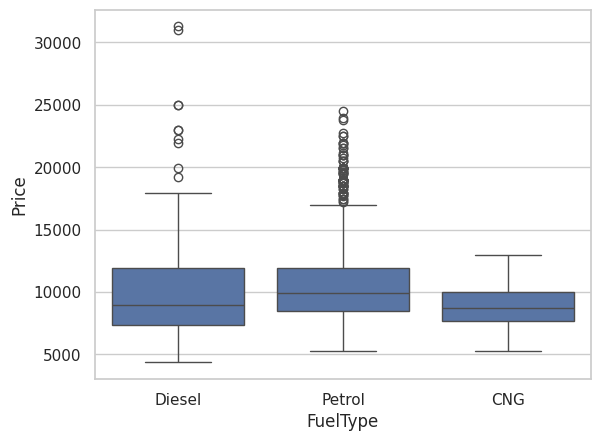

In [ ]:
sns.boxplot(y=cars_data['Price'], x=cars_data['FuelType'])

**Removing outliers usig TRIMMING Method**
- Numerical data to interpret 5 number summary

In [ ]:
sns.set(style="whitegrid")

# Calculate the statistical summary for 'Price'
price_summary = cars_data['Price'].describe()
print(price_summary)

# Identify outliers - IQR method
IQR = price_summary['75%'] - price_summary['25%']
lower_bound = price_summary['25%'] - 1.5 * IQR
upper_bound = price_summary['75%'] + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Filter out the outliers from the dataset
outliers = cars_data[(cars_data['Price'] < lower_bound) | (cars_data['Price'] > upper_bound)]
non_outliers = cars_data[(cars_data['Price'] >= lower_bound) & (cars_data['Price'] <= upper_bound)]



count     1096.000000
mean     10735.937044
std       3636.716945
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      31275.000000
Name: Price, dtype: float64
Lower Bound: 3200.0
Upper Bound: 17200.0


**Box and Whiskers Plot Visualization**

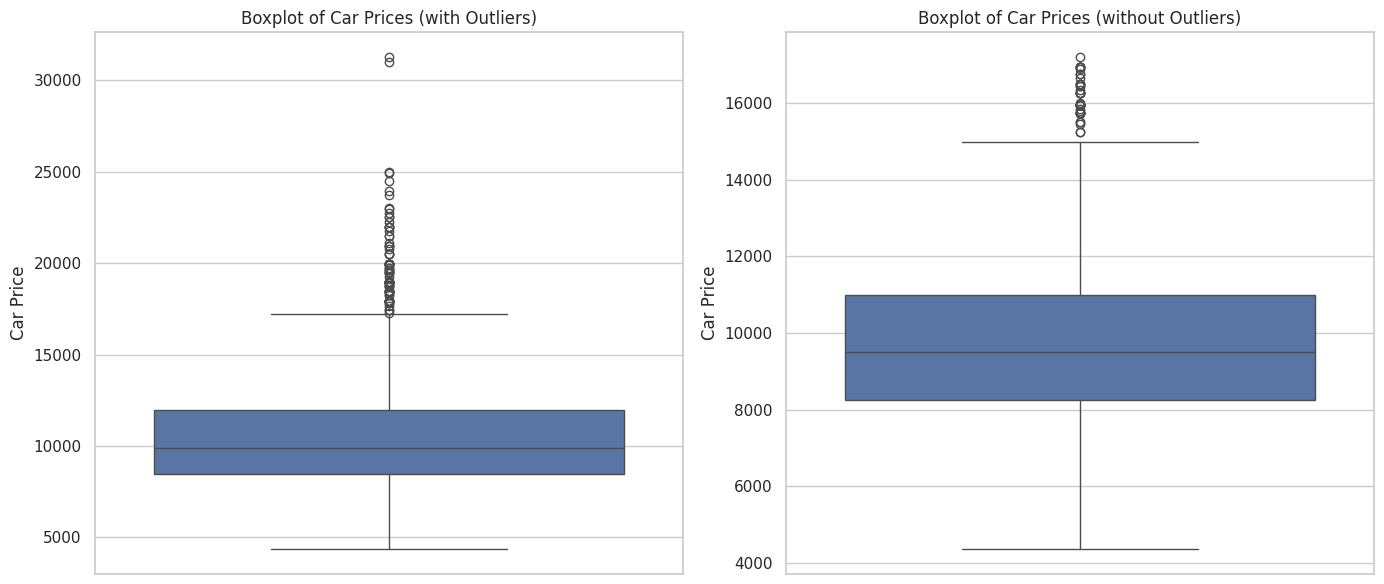

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Boxplot - outliers
sns.boxplot(y='Price', data=cars_data, ax=axes[0])
axes[0].set_title('Boxplot of Car Prices (with Outliers)')
axes[0].set_ylabel('Car Price')

# Boxplot - outliers
sns.boxplot(y='Price', data=non_outliers_data, ax=axes[1])
axes[1].set_title('Boxplot of Car Prices (without Outliers)')
axes[1].set_ylabel('Car Price')

plt.tight_layout()
plt.show()

**CAPPING method - by specifying the upper limit**

<Figure size 1000x600 with 0 Axes>

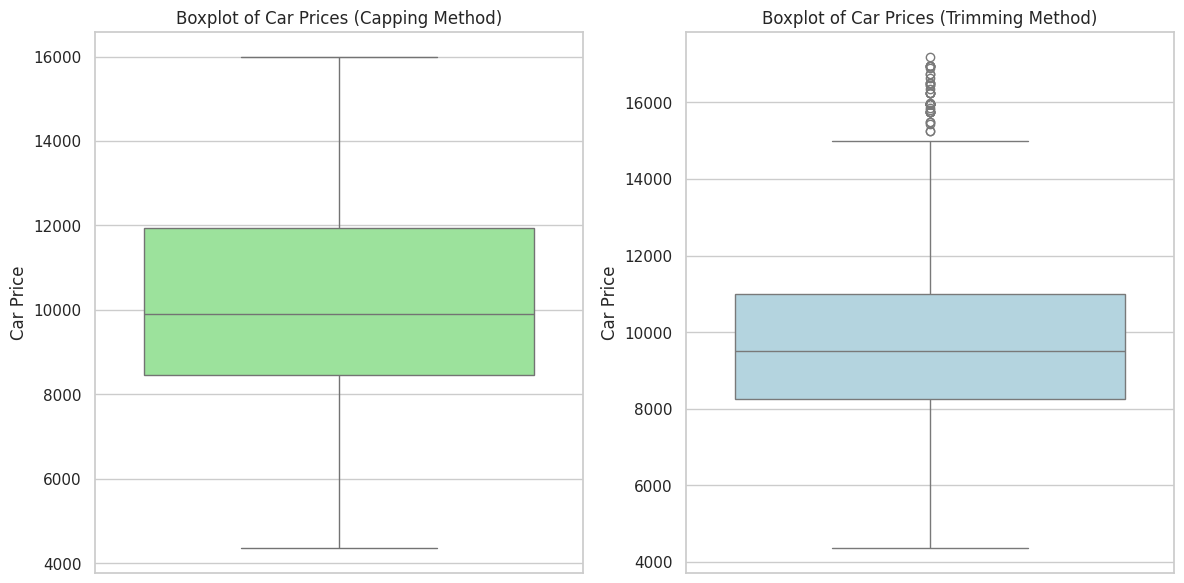

In [ ]:
# Capping the outliers
upper_limit = 16000
cars_data['Capped_Price'] = cars_data['Price'].clip(upper=upper_limit)

plt.figure(figsize=(10, 6))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot - Capped Prices
sns.boxplot(y='Capped_Price', data=cars_data, ax=axes[0], color='lightgreen')
axes[0].set_title('Boxplot of Car Prices (Capping Method)')
axes[0].set_ylabel('Car Price')

# Boxplot - Non-Outliers (Trimming Method)
sns.boxplot(y='Price', data=non_outliers_data, ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot of Car Prices (Trimming Method)')
axes[1].set_ylabel('Car Price')

plt.tight_layout()
plt.show()